In [2]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [3]:
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        images = batch[b'data']
        labels = batch[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        images = images.astype('float32') / 255.0
        labels = np.array(labels)
        return images, labels

train_images = []
train_labels = []

for i in range (5):
    file_path = f"D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/data_batch_{i+1}"
    images, labels = load_cifar10_batch(file_path)
    train_images.append(images)
    train_labels.append(labels)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

x_test, y_test = load_cifar10_batch("D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/test_batch")

In [4]:
x_train, x_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

### Keras

<p>
Spesifikasi:<br/>
6 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
3 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 128 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [5]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

C:\Users\Nicholas R. Sihite\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.3092 - loss: 1.8406 - val_accuracy: 0.5403 - val_loss: 1.2501
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 49ms/step - accuracy: 0.5853 - loss: 1.1675 - val_accuracy: 0.6433 - val_loss: 1.0066
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6816 - loss: 0.8962 - val_accuracy: 0.6879 - val_loss: 0.8845
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7465 - loss: 0.7279 - val_accuracy: 0.7235 - val_loss: 0.7997
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7817 - loss: 0.6210 - val_accuracy: 0.7512 - val_loss: 0.7363
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8193 - loss: 0.5135 - val_accuracy: 0.7696 - val_loss: 0.6765
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8553 - loss: 0.4231 - val_accuracy: 0.7716 - val_loss: 0.7194
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8780 - loss: 0.3454 - 

### Scratch

<p>
Spesifikasi:<br/>
6 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
3 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 128 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [6]:
# model_2 = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     AveragePooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     AveragePooling2D(2, 2),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

# model_2.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history_2 = model_2.fit(
#     x_train, y_train,
#     epochs=10,
#     batch_size=64,
#     validation_data=(x_val, y_val)
# )

In [7]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model Keras

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1000
           1       0.87      0.86      0.86      1000
           2       0.68      0.65      0.66      1000
           3       0.61      0.56      0.58      1000
           4       0.70      0.73      0.72      1000
           5       0.69      0.68      0.68      1000
           6       0.78      0.81      0.80      1000
           7       0.82      0.83      0.83      1000
           8       0.90      0.81      0.85      1000
           9       0.79      0.88      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Macro F1-score: 0.7612


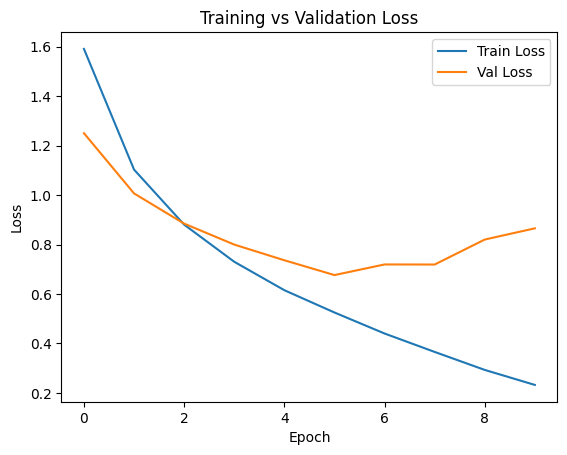

0.7612034485569639

In [8]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model Scratch

In [9]:
# evaluate_model(model_2, x_test, y_test, history_2)